In [1]:
# dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# file paths
mouse_data_filepath = "data/mouse_drug_data.csv"
trial_data_filepath = "data/clinicaltrial_data.csv"

# read mouse drug data and clinical trial data CSVs
mouse_data = pd.read_csv(mouse_data_filepath)
trial_data = pd.read_csv(trial_data_filepath)

# Combine the data into a single dataset
original_combined_df = trial_data.merge(mouse_data, on ='Mouse ID')

# isolate Capomulin, Infubinol, Ketapril, and Placebo data for observation and analysis
original_combined_df = original_combined_df.loc[(original_combined_df['Drug'] == 'Capomulin') | \
                                                (original_combined_df['Drug'] == 'Infubinol') | \
                                                (original_combined_df['Drug'] == 'Ketapril') | \
                                                (original_combined_df['Drug'] == 'Ramicane') | \
                                              (original_combined_df['Drug'] == 'Placebo') ]

# Display the data table for preview
original_combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# tumor_df_grouped_mean stores the mean tumor volume data grouped by drug and timepoint 
tumor_df = original_combined_df[["Timepoint", "Tumor Volume (mm3)", "Drug"]]
tumor_df_grouped_mean = tumor_df.groupby(["Drug", "Timepoint"]).mean()

# convert to dataframe
tumor_grouped_mean_df = pd.DataFrame(tumor_df_grouped_mean).reset_index()

# preview df
tumor_grouped_mean_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# tumor_df_grouped_sem stores the Standard Error tumor volume data grouped by drug and timepoint 
tumor_df = original_combined_df[["Timepoint", "Tumor Volume (mm3)", "Drug"]]
tumor_df_grouped_sem = tumor_df.groupby(["Drug", "Timepoint"]).sem()

# convert to dataframe
tumor_df_grouped_sem1 = pd.DataFrame(tumor_df_grouped_sem).reset_index()

#reformating the dataframes for figure preparation
tumor_df_grouped_sem2 = tumor_df_grouped_sem.swaplevel()
tumor_df_grouped_sem2 = tumor_df_grouped_sem2.unstack()

# preview df
tumor_df_grouped_sem1.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_df_grouped_mean2 = tumor_df_grouped_mean.swaplevel()
tumor_df_grouped_mean2 = tumor_df_grouped_mean2.unstack()

# Preview that Reformatting worked
tumor_df_grouped_mean2

Tumor Volume (mm3)                                            
Drug               Capomulin  Infubinol   Ketapril    Placebo   Ramicane
Timepoint                                                               
0                  45.000000  45.000000  45.000000  45.000000  45.000000
5                  44.266086  47.062001  47.389175  47.125589  43.944859
10                 43.084291  49.403909  49.582269  49.423329  42.531957
15                 42.064317  51.296397  52.399974  51.359742  41.495061
20                 40.716325  53.197691  54.920935  54.364417  40.238325
25                 39.939528  55.715252  57.678982  57.482574  38.974300
30                 38.769339  58.299397  60.994507  59.809063  38.703137
35                 37.816839  60.742461  63.371686  62.420615  37.451996
40                 36.958001  63.162824  66.068580  65.052675  36.574081
45                 36.236114  65.755562  70.662958  68.084082  34.955595

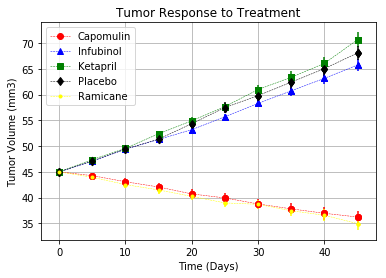

In [15]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
tumor_df_grouped_mean3 = tumor_df_grouped_mean2.reset_index()

# fig and axes formatting
markers = ["o", "^", "s", "d", ".", "^", "s", "d", "o", "^", "s", "d",]
colors = ['red', 'blue','green', 'black','yellow', 'blue','green', 'black', 'red', 'blue','green', 'black']
lbls_tumor = tumor_df_grouped_mean2["Tumor Volume (mm3)"]
ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.grid()
x = tumor_df_grouped_mean3["Timepoint"]
y = tumor_df_grouped_mean2
dy = tumor_df_grouped_sem2

for i, v in enumerate ((tumor_df_grouped_mean2.columns)):
    plt.scatter(x,y[v], marker = markers[i], color = colors[i]) # marker=markers )
    plt.plot(x, y[v], marker = markers[i], color = colors[i], linestyle = "--", linewidth = "0.5")
    plt.errorbar(x, y[v], yerr=dy[v], fmt=markers[i], color = colors[i], ecolor = colors[i])
    
plt.legend(labels = lbls_tumor)

# Save the Figure
plt.savefig("tumor_change_scatter.png")
plt.show()


## Metastatic Response to Treatment

In [16]:
# metastatic_df_grouped_mean stores the mean metastatic site data grouped by drug and timepoint 
metastatic_df = original_combined_df[["Timepoint", "Metastatic Sites", "Drug"]]
metastatic_df_grouped_mean = metastatic_df.groupby(["Drug", "Timepoint"]).mean()

# convert to df
metastatic_grouped_mean_df = pd.DataFrame(metastatic_df_grouped_mean).reset_index()

# preview df
metastatic_grouped_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [17]:
# metastatic_df_grouped_sem stores the Standard Error metastatic site data grouped by drug and timepoint 
metastatic_df = original_combined_df[["Timepoint", "Metastatic Sites", "Drug"]]
metastatic_df_grouped_sem = metastatic_df.groupby(["Drug", "Timepoint"]).sem()

#reformating the dataframes for figure preparation
metastatic_df_grouped_sem2 = metastatic_df_grouped_sem.swaplevel()
metastatic_df_grouped_sem2 = metastatic_df_grouped_sem2.unstack()

# convert to df
metastatic_df_grouped_sem = pd.DataFrame(metastatic_df_grouped_sem).reset_index()

# preview df
metastatic_df_grouped_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [18]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_df_grouped_mean2 = metastatic_df_grouped_mean.swaplevel()
metastatic_df_grouped_mean2 = metastatic_df_grouped_mean2.unstack()

# Preview that Reformatting worked
metastatic_df_grouped_mean2

Metastatic Sites                                        
Drug             Capomulin Infubinol  Ketapril   Placebo  Ramicane
Timepoint                                                         
0                 0.000000  0.000000  0.000000  0.000000  0.000000
5                 0.160000  0.280000  0.304348  0.375000  0.120000
10                0.320000  0.666667  0.590909  0.833333  0.250000
15                0.375000  0.904762  0.842105  1.250000  0.333333
20                0.652174  1.050000  1.210526  1.526316  0.347826
25                0.818182  1.277778  1.631579  1.941176  0.652174
30                1.090909  1.588235  2.055556  2.266667  0.782609
35                1.181818  1.666667  2.294118  2.642857  0.952381
40                1.380952  2.100000  2.733333  3.166667  1.100000
45                1.476190  2.111111  3.363636  3.272727  1.250000

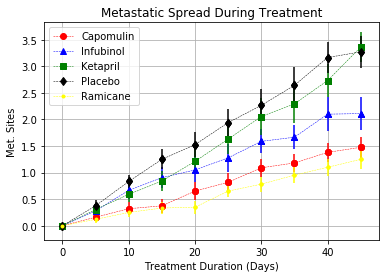

In [19]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
metastatic_df_grouped_mean3 = metastatic_df_grouped_mean2.reset_index()

#fig and axes formatting

lbls_metastatic = metastatic_df_grouped_mean2["Metastatic Sites"]
ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.grid()
x = metastatic_df_grouped_mean3["Timepoint"]
y = metastatic_df_grouped_mean2
dy = metastatic_df_grouped_sem2

for i, v in enumerate ((metastatic_df_grouped_mean2.columns)):
    plt.scatter(x,y[v], marker = markers[i], color = colors[i]) # marker=markers )
    plt.plot(x, y[v], marker = markers[i], color = colors[i], linestyle = "--", linewidth = "0.5")
    plt.errorbar(x, y[v], yerr=dy[v], fmt=markers[i], color = colors[i], ecolor = colors[i])
    
plt.legend(labels = lbls_metastatic)

# Save the Figure
plt.savefig("metastatic_change_scatter.png")

# Show the Figure
plt.show()

## Survival Rates

In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
surv_df = original_combined_df[["Mouse ID", "Drug", "Timepoint"]]
surv_df_grouped_count = surv_df.groupby(["Drug", "Timepoint"]).count()

#reformating the dataframes for figure preparation
surv_df_grouped_count2 = surv_df_grouped_count.swaplevel()
surv_df_grouped_count2 = surv_df_grouped_count2.unstack()
surv_df_grouped_percent = surv_df_grouped_count2/25*100
# Convert to DataFrame
surv_grouped_count_df = pd.DataFrame(surv_df_grouped_count).reset_index()
# Preview DataFrame
surv_grouped_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [21]:
# Minor Data Munging to Re-Format the Data Frames
surv_df_grouped_count1 = surv_df_grouped_count.swaplevel()
surv_df_grouped_count1 = surv_df_grouped_count1.unstack()
# Preview the Data Frame
surv_df_grouped_count1.head()

Mouse ID                                    
Drug      Capomulin Infubinol Ketapril Placebo Ramicane
Timepoint                                              
0                25        25       25      25       25
5                25        25       23      24       25
10               25        21       22      24       24
15               24        21       19      20       24
20               23        20       19      19       23

           Mouse ID                                    
Drug      Capomulin Infubinol Ketapril Placebo Ramicane
Timepoint                                              
0             100.0     100.0    100.0   100.0    100.0
5             100.0     100.0     92.0    96.0    100.0
10            100.0      84.0     88.0    96.0     96.0
15             96.0      84.0     76.0    80.0     96.0
20             92.0      80.0     76.0    76.0     92.0
25             88.0      72.0     76.0    68.0     92.0
30             88.0      68.0     72.0    60.0     92.0
35             88.0      48.0     68.0    56.0     84.0
40             84.0      40.0     60.0    48.0     80.0
45             84.0      36.0     44.0    44.0     80.0


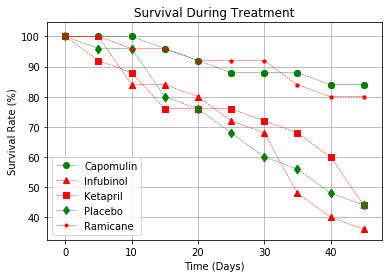

In [25]:
# Generate the Plot (Accounting for Percentages)
fig, ax = plt.subplots()
surv_df_grouped_count3 = surv_df_grouped_count2.reset_index()

#fig and axes formatting
lbls_surv = surv_df_grouped_count2["Mouse ID"]
ax.set_title("Survival During Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.grid()
x = surv_df_grouped_count3["Timepoint"]
y = surv_df_grouped_percent
print(y)
for i, v in enumerate ((surv_df_grouped_percent.columns)):
    plt.scatter(x,y[v], marker = markers[i], color = colors[i]) # marker=markers )
    plt.plot(x, y[v], marker = markers[i], color = colors[i], linestyle = "--", linewidth = "0.5")

plt.legend(labels = lbls_surv)

# Save the Figure
plt.savefig("surv_percentage_scatter.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [23]:
# Calculating the percent change after each drug treatment for 45 days
drug_list = original_combined_df["Drug"].unique()
drug_list_percent = pd.DataFrame({ "Drug": drug_list,
                                  "Percent Change": [(tumor_df_grouped_mean2["Tumor Volume (mm3)"][drug][45] \
                                                   -tumor_df_grouped_mean2["Tumor Volume (mm3)"][drug][0]) \
                                                  /(tumor_df_grouped_mean2["Tumor Volume (mm3)"][drug][0])*100 \
                                                    for drug in drug_list]
})

# Displaying the data 
drug_list_percent


,Drug,Percent Change
0,Capomulin,-19.475303
1,Ketapril,57.028795
2,Infubinol,46.123472
3,Ramicane,-22.320900
4,Placebo,51.297960


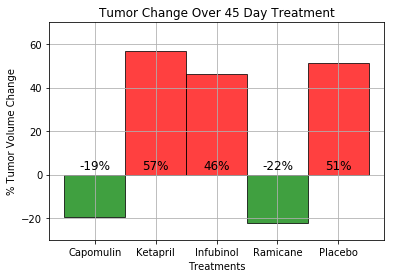

In [24]:
# Store all Relevant Percent Changes into a Tuple
x_axis = drug_list_percent["Drug"]
y_values = tuple(drug_list_percent["Percent Change"])
y_values_str = (drug_list_percent["Percent Change"]/100).map("{:.0%}".format)

# Splice the data between passing (green) and failing drugs (red)
drug_list_percent["Pass/Fail"] = ['green' if (drug_list_percent["Percent Change"][i]<0) else ('red') for i in range(0, len(x_axis))]

# set bar colors according to pass/fail
colors = drug_list_percent["Pass/Fail"]
text_color = 'black' 

# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots() 
ax.set_ylim(-30, 70)
ax.set_yticks(np.arange(-20, 80, 20.0))
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xlabel("Treatments")
ax.set_ylabel("% Tumor Volume Change")
ax.grid(snap = True)
                   
# ploting figure
ax.bar(x_axis, y_values, color = colors, alpha = 0.75, width = 1, edgecolor = 'black')


# Use functions to label the percentages of changes

#def percent_label(ax, ):
    
for i,v in enumerate(y_values):
    #plt.text(x = i-0.1, y=1, s = y_values_str[i], size =10,horizontalalignment='center', verticalalignment='center')
    plt.text(x=i, y=1, s = y_values_str[i], size =12,horizontalalignment='center', verticalalignment='bottom')


# Call functions to implement the function calls


# Save the Figure
plt.savefig("tumor_change_percent_bar.png")

# Show the Figure
plt.show()